In [1]:
# import libraries

import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the music csv file which is inside data folder

df = pd.read_csv("../data/music_dataset_mod.csv")

df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [3]:
# create a safe-to-modify copy of this DataFrame using the copy() method. This ensures that any changes you make won't affect the original dataset.
df_music_realistic = df.copy()
df_music_realistic

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [4]:
# Gain valuable insights into your data
df_music_realistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
df_music_realistic["Genre"].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

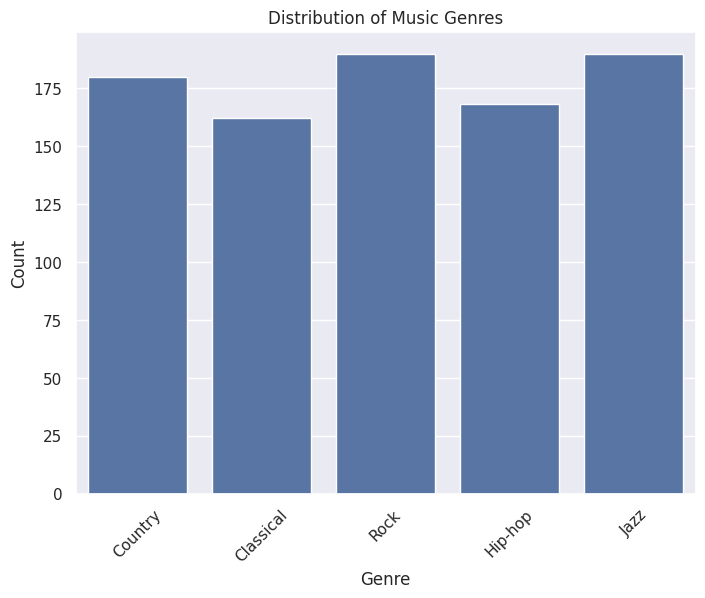

In [6]:
# Employ seaborn's countplot() function to visually represent the distribution in your dataset's Genre column.

plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_music_realistic)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Part 2: Correlation Analysis


In [7]:
# Create a new copy of your DataFrame and drop missing rows
df_music_realistic_nonull = df_music_realistic.dropna()
df_music_realistic_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [8]:
# Divide your dataset into features and targets.

X = df_music_realistic_nonull.drop(columns=['Genre'])
y = df_music_realistic_nonull['Genre']

In [9]:
# Initiate the LabelEncoder() class and apply the fit_transform() method to convert the categorical Genre values into numerical form. This transformation is vital for subsequent analysis.

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [10]:
y_encoded[:5]

array([1, 0, 4, 2, 1])

In [11]:
# Replace the original Genre column in a new DataFrame copy with the numerically encoded genre data, labeling this new column as Genre_encoded.
df_with_encoded_genre = df_music_realistic_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded
df_with_encoded_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


In [12]:
# let's see how the data are co releated
co_matr = df_with_encoded_genre.corr()
co_matr

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


Text(0.5, 1.0, 'Correlation Matrix')

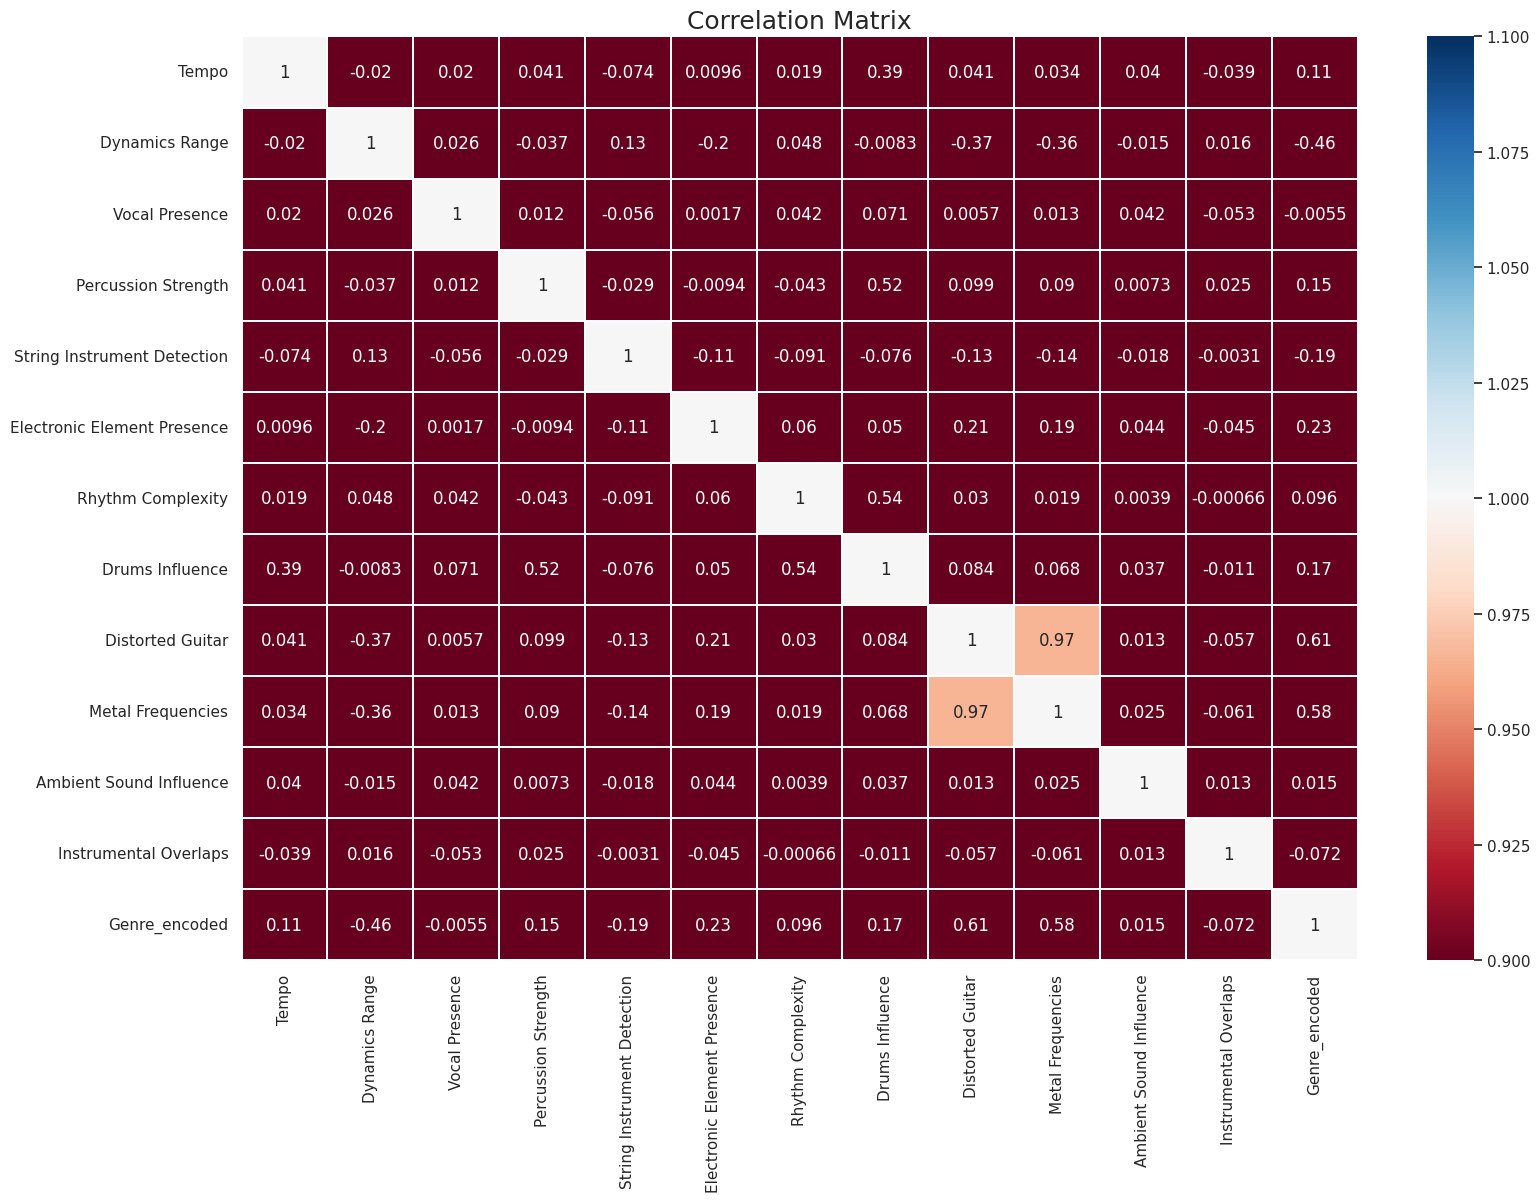

In [13]:
# let's visualize to have a better understand.

# Generate a correlation matrix for the modified DataFrame using the corr() method. To visually represent this matrix, 
# use seaborn's heatmap() function. For optimal display, set appropriate dimensions and parameters for the heatmap graph as follows:

plt.figure(figsize=(18, 12))

sns.heatmap(co_matr, vmin=1,
            vmax=1, annot=True,cmap="RdBu",
            linewidths=0.1)
plt.title("Correlation Matrix", fontsize=18)

## Part 3: PCA for Dimensionality Reduction


In [15]:
# Use the StandardScaler() from sklearn to standardize your data. Apply the fit_transform() method and store the standardized features in a variable called X_scaled.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([-0.32276419,  0.63236264,  0.05320844,  1.50523556, -1.45322339,
       -0.95083358, -0.28019766, -0.04531774,  0.98696183,  0.76493507,
        1.53633887,  0.16037718])

In [16]:
# Implement PCA without specifying the number of components initially. This way, you’ll obtain the same number of components as the number of features.

pca = PCA()
pca

PCA()

In [17]:
X_pca = pca.fit_transform(X_scaled)
X_pca[0]

array([ 1.0572597 ,  0.28161626,  0.62342202, -0.73574456,  1.29328805,
        1.05439349, -0.24994853, -0.27158679, -1.99869602,  0.74994362,
       -0.41133069,  0.20089952])

In [19]:
# Calculate the explained variance ratio for each component using pca.explained_variance_ratio_.

explained_var = pca.explained_variance_ratio_
explained_var

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

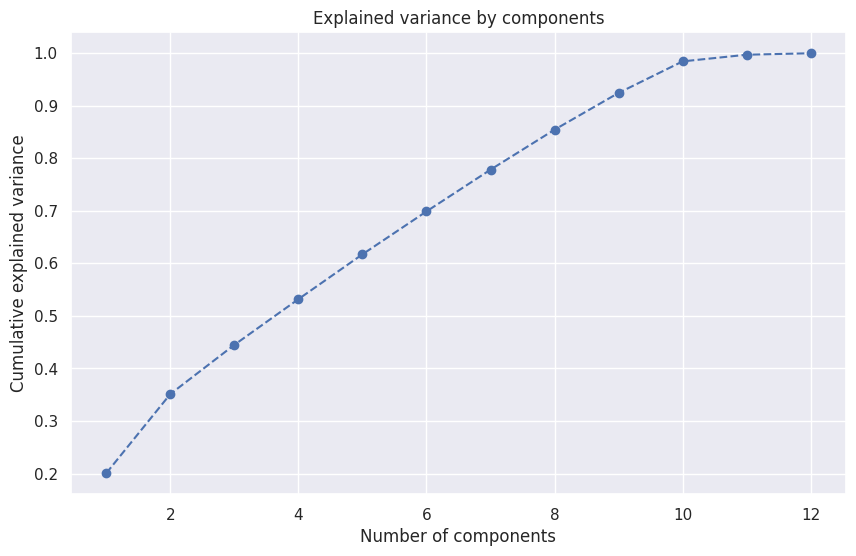

In [20]:
# Visualize the explained variance against the number of principal components to determine how many you will use for the model. 
# Display the cumulative variance with the cumsum() method.

plt.figure(figsize=(10,6))
plt.plot(range(1, 13), explained_var.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [21]:
# After deciding the number of components, perform PCA again by defining n_components=8 and transform your scaled data with this PCA model.

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
X_pca[0]

array([ 1.0572597 ,  0.28161626,  0.62342202, -0.73574456,  1.29328805,
        1.05439349, -0.24994853, -0.27158679])

# Part 4: Evaluating Classification Efficacy – PCA-Transformed vs. Original Data


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(623, 8)

In [24]:
X_test.shape

(267, 8)

In [25]:
# Employ a Logistic Regression model with an increased iteration limit (e.g., max_iter=10000) and train it on the PCA-transformed dataset's training data.

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [26]:
# Use the Logistic Regression model you trained to make predictions on your test set. Afterward, assess the model’s accuracy by applying the accuracy_score() method.
#  Produce a classification report with the classification_report() function to comprehensively evaluate the model's performance.

y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.5355805243445693

Classification Report:
               precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [27]:
# Carry out the same procedure with the original dataset that PCA hasn't modified. 
# This step requires dividing the scaled original features (X_scaled) and the encoded target variable into training and testing subsets. S
# ubsequently, train a new Logistic Regression model using this non-PCA-transformed data.

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [28]:
# Make predictions using this second model and assess its performance.

y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))


Accuracy with Original Features: 0.5318352059925093

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267




# Part 5: Genre Prediction and Integration


In [29]:
# Locate and separate the rows in your original DataFrame that lack Genre information. Store the result in a new DataFrame called df_unknown_genre.

df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()]



In [30]:
# Eliminate the Genre column from this identified subset of data.

X_unknown = df_unknown_genre.drop(columns=['Genre'])

In [31]:
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

In [32]:
# Employ the previously selected and trained classifier to predict the genres of these tracks.

y_unknown_pred = classifier.predict(X_unknown_pca)


In [33]:
# Apply LabelEncoder.inverse_transform() to transform the numerical predictions into their corresponding original genre labels.

df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

/tmp/ipykernel_30405/3150620355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)


In [34]:
# Use the print() function to review the DataFrame and verify that the model's predictions have correctly inserted the previously missing genre data.

print(df_unknown_genre[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]
